In [46]:
# Importing libraries and functions

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import calendar
import scipy.stats as st
import os
import warnings
from matplotlib.gridspec import GridSpec
warnings.filterwarnings("ignore")

path = Path(os.getcwd())
maindir = path.parents[0]

execfile(f"{path}/Utilities/functions.py")

Parameters

In [21]:
# Parameters

# Only parameter to change - if a new site is added
ls_site = ["A", "B", "C", "NOY", "TRE"]     # All the sites should be here, this dictates which datasets are imported


# Shouldn't need to be changed
Save_files = "No"                           # Choose Yes to save graphs in the Results folder, No to just print them in output cells
filter = "3h"                               # Time smoothing
poly_deg = 2                                # Polynomial fit degree
heights = [37, 56.5, 78, 96.5, 118, 135, 155, 175, 198]

Importing datasets

IMPORTANT: when getting results for model 2, random samples are selected. The datasets have to be called again if you want to have complete datasets (to re-run model 0 or model 1 for example)

In [60]:
datasets(ls_site)

[1/6] Importing power dataset...
[2/6] Site A:
	 Importing ERA5's dataset...
	 Importing lidar and meteo station's datasets...
	 Exporting the dataset...
[3/6] Site B:
	 Importing ERA5's dataset...
	 Importing lidar and meteo station's datasets...
	 Exporting the dataset...
[4/6] Site C:
	 Importing ERA5's dataset...
	 Importing lidar and meteo station's datasets...
	 Exporting the dataset...
[5/6] Site NOY:
	 Importing ERA5's dataset...
	 Importing lidar and meteo station's datasets...
	 Exporting the dataset...
[6/6] Site TRE:
	 Importing ERA5's dataset...
	 Importing lidar and meteo station's datasets...
	 Exporting the dataset...


Model 0

	 Plotting global graph...


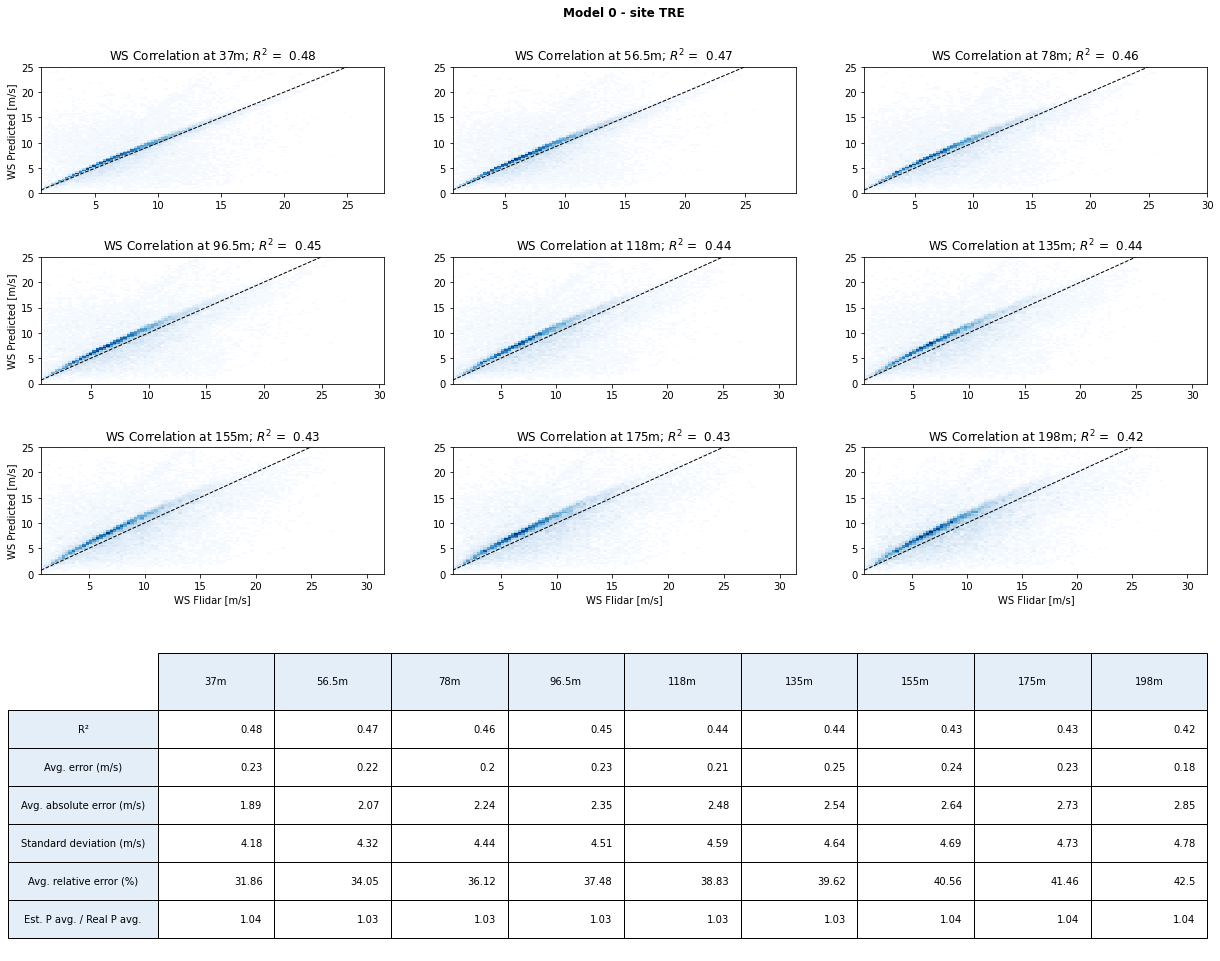

In [61]:
site = "TRE"                       # Choose a site from the ls_site list (by default A, B, C, TRE, NOY)
ls_results = ["global"]            # Choose the type of graph to display: global - monthly - 3d
directional_alpha = "constant"     # constant: unidirectional - variable: directional
new_site = True                    # True: sets alpha to 0.08 (default value with an unknown site), False: uses the alpha given for the site

model0(site, ls_results, Save_files, directional_alpha, new_site)

In [62]:
# data prep

globals()[f"df_{site}"]["Error"] = 100*np.abs(globals()[f"df_{site}"]["WS_118"] - globals()[f"df_{site}"]["Average Horizontal Wind Speed 118m"])/globals()[f"df_{site}"]["Average Horizontal Wind Speed 118m"]
globals()[f"df_{site}"]["bias"] = 100*(globals()[f"df_{site}"]["WS_118"] - globals()[f"df_{site}"]["Average Horizontal Wind Speed 118m"])/globals()[f"df_{site}"]["Average Horizontal Wind Speed 118m"]

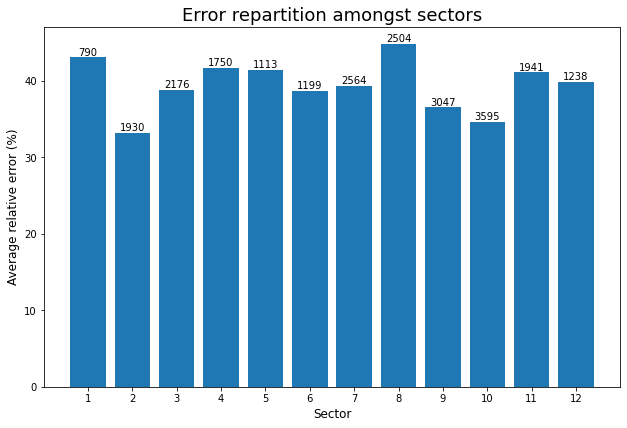

In [63]:
# Sector

n = int(globals()[f"df_{site}"]["sector"].max())
bins_sector = np.linspace(0,n-1,n)+1

df_hist_sector = globals()[f"df_{site}"].groupby("sector")\
                                .agg({'sector':'size', 'Error':'mean'})\
                                .rename(columns={'sector':'count', 'Error':'Error'})

df_hist_sector["Sector"] = bins_sector.astype(int)

fig = plt.figure(figsize=(8, 5))
ax = fig.add_axes([0,0,1,1])
ax.bar(df_hist_sector["Sector"], df_hist_sector["Error"])

ax.set_xlabel("Sector", fontsize=12)
ax.set_ylabel("Average relative error (%)", fontsize=12)
ax.set_title("Error repartition amongst sectors", fontsize=18)

ax.set_xticks(bins_sector)

rects = ax.patches

labels = df_hist_sector['count']

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height, label, ha="center", va="bottom"
    )

plt.show()

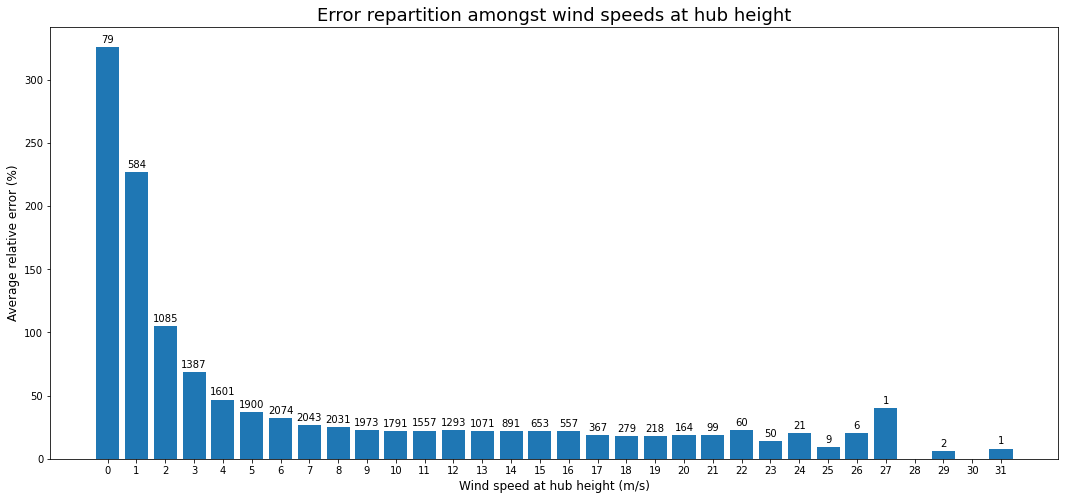

In [64]:
# Hub WS

n = int(globals()[f"df_{site}"]["Average Horizontal Wind Speed 118m"].max())
bins = np.linspace(0,n,n+1)
globals()[f"df_{site}"]["WS_lidar_bin"] = np.digitize(globals()[f"df_{site}"]["Average Horizontal Wind Speed 118m"], bins)

df_hist_hub = globals()[f"df_{site}"].groupby("WS_lidar_bin")\
                                .agg({'WS_lidar_bin':'size', 'Error':'mean'})\
                                .rename(columns={'WS_lidar_bin':'count', 'Error':'Error'})


fig = plt.figure(figsize=(14, 6))
ax = fig.add_axes([0,0,1,1])
ax.bar(df_hist_hub.index - 1, df_hist_hub["Error"])

ax.set_xlabel("Wind speed at hub height (m/s)", fontsize=12)
ax.set_ylabel("Average relative error (%)", fontsize=12)
ax.set_title("Error repartition amongst wind speeds at hub height", fontsize=18)

ax.set_xticks(bins)

rects = ax.patches

labels = df_hist_hub['count']

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height+2, label, ha="center", va="bottom"
    )

plt.show()

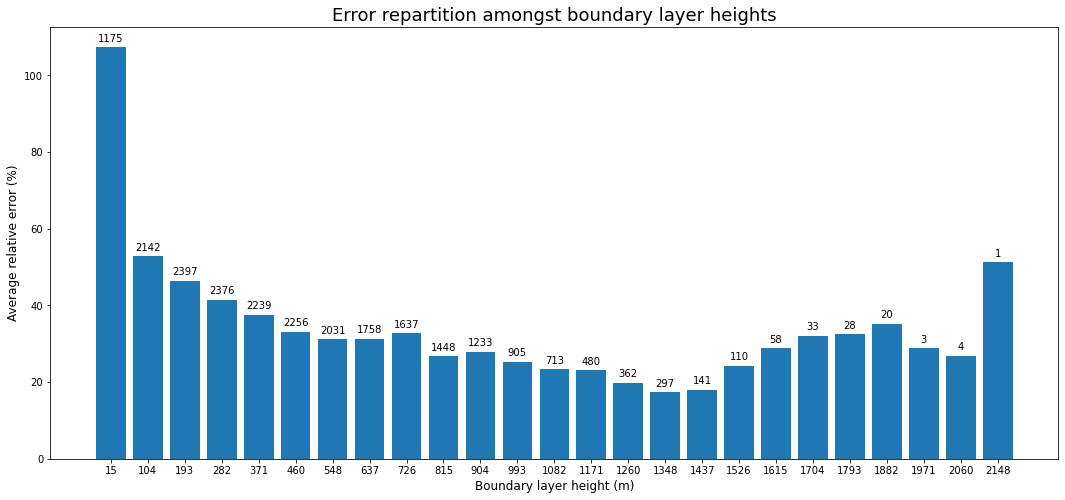

In [65]:
# blh

min = globals()[f"df_{site}"]["blh"].min()
max = globals()[f"df_{site}"]["blh"].max()
bins = np.linspace(min,max,25)
globals()[f"df_{site}"]["blh_bin"] = np.digitize(globals()[f"df_{site}"]["blh"], bins)

df_hist_blh = globals()[f"df_{site}"].groupby("blh_bin")\
                                .agg({'blh_bin':'size', 'Error':'mean'})\
                                .rename(columns={'blh_bin':'count', 'Error':'Error'})

df_hist_blh = df_hist_blh.reindex(list(range(df_hist_blh.index.min(),df_hist_blh.index.max()+1)),fill_value=0)
df_hist_blh["blh"] = bins.astype(int)

fig = plt.figure(figsize=(14, 6))
ax = fig.add_axes([0,0,1,1])
ax.bar(df_hist_blh["blh"].astype(str), df_hist_blh["Error"])

ax.set_xlabel("Boundary layer height (m)", fontsize=12)
ax.set_ylabel("Average relative error (%)", fontsize=12)
ax.set_title("Error repartition amongst boundary layer heights", fontsize=18)


rects = ax.patches

labels = df_hist_blh['count']

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height+1, label, ha="center", va="bottom"
    )

plt.show()

In [66]:
# Base WS and chnk - data prep

n = int(globals()[f"df_{site}"]["WS"].max())
bins_WS = np.linspace(0,n,n+1)
globals()[f"df_{site}"]["WS_bin"] = np.digitize(globals()[f"df_{site}"]["WS"], bins_WS)

df_hist_WS = globals()[f"df_{site}"].groupby("WS_bin")\
                                .agg({'WS_bin':'size', 'Error':'mean'})\
                                .rename(columns={'WS_bin':'count', 'Error':'Error'})


# Chnk

min = globals()[f"df_{site}"]["chnk"].min()
max = globals()[f"df_{site}"]["chnk"].max()
bins_chnk = np.linspace(min,max,25)
globals()[f"df_{site}"]["chnk_bin"] = np.digitize(globals()[f"df_{site}"]["chnk"], bins_chnk)

df_hist_chnk = globals()[f"df_{site}"].groupby("chnk_bin")\
                                .agg({'chnk_bin':'size', 'Error':'mean'})\
                                .rename(columns={'chnk_bin':'count', 'Error':'Error'})

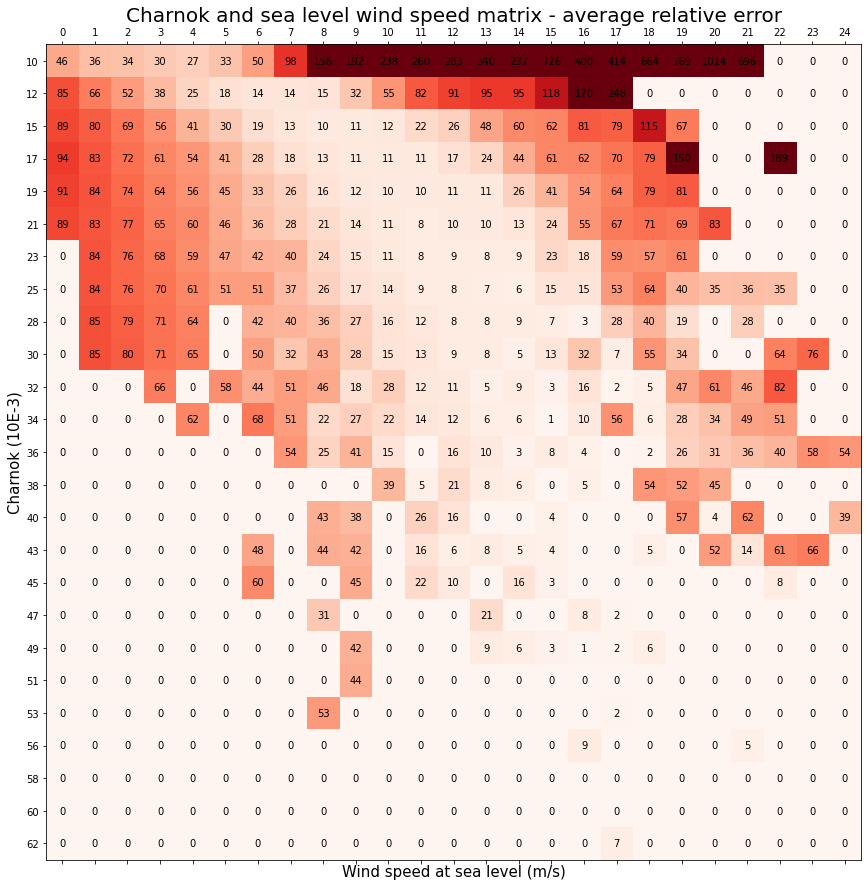

In [67]:
# Base WS and chnk - error graph

Matrix = np.zeros((len(bins_chnk), len(bins_WS)))
Matrix_counter = np.zeros((len(bins_chnk), len(bins_WS)))

for index, row in globals()[f"df_{site}"].iterrows():
      Matrix[int(row["chnk_bin"])-1, int(row["WS_bin"])-1] += row["Error"]
      Matrix_counter[int(row["chnk_bin"])-1, int(row["WS_bin"])-1] += 1

for i in range(len(Matrix)):
      for j in range(len(Matrix[0])):
            Matrix[i,j] /= Matrix_counter[i,j]

Matrix[np.isnan(Matrix)] = 0
int_matrix = Matrix.astype(int)

fig, ax = plt.subplots(figsize=(15,15), facecolor="white")
ax.matshow(int_matrix, cmap="Reds", vmin=0, vmax=150)

ax.set_xlabel("Wind speed at sea level (m/s)", fontsize=15)
ax.set_ylabel("Charnok (10E-3)", fontsize=15)
ax.set_title("Charnok and sea level wind speed matrix - average relative error", fontsize=20)

yticks = bins_chnk*1000
yticks = yticks.astype(int)

ax.set_xticks(bins_WS)
ax.set_yticks([i for i in range(25)])
ax.set_yticklabels([str(int(elem*1000)) for elem in bins_chnk])

for i in range(len(bins_WS)):
   for j in range(len(bins_chnk)):
      c = int_matrix[j, i]
      ax.text(i, j, str(c), va='center', ha='center')

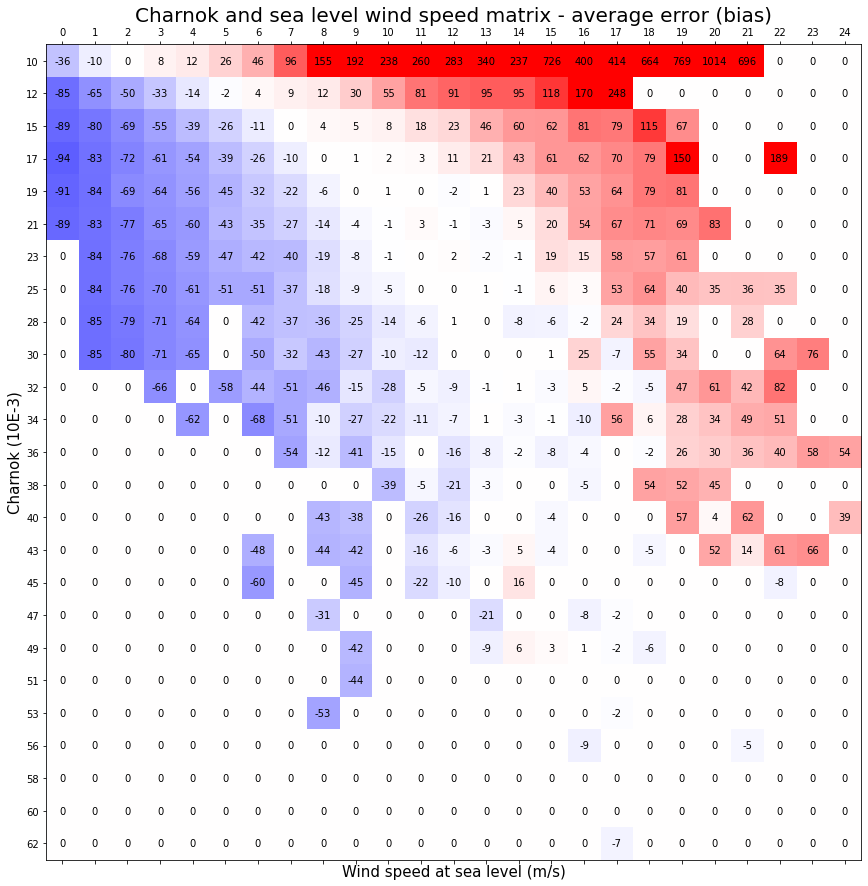

In [68]:
# Base WS and chnk - bias error graph

Matrix = np.zeros((len(bins_chnk), len(bins_WS)))
Matrix_counter = np.zeros((len(bins_chnk), len(bins_WS)))

for index, row in globals()[f"df_{site}"].iterrows():
      Matrix[int(row["chnk_bin"])-1, int(row["WS_bin"])-1] += row["bias"]
      Matrix_counter[int(row["chnk_bin"])-1, int(row["WS_bin"])-1] += 1

for i in range(len(Matrix)):
      for j in range(len(Matrix[0])):
            Matrix[i,j] /= Matrix_counter[i,j]

Matrix[np.isnan(Matrix)] = 0
int_matrix = Matrix.astype(int)


fig, ax = plt.subplots(figsize=(15,15), facecolor="white")
ax.matshow(int_matrix, cmap="bwr", vmin=-150, vmax=150)

ax.set_xlabel("Wind speed at sea level (m/s)", fontsize=15)
ax.set_ylabel("Charnok (10E-3)", fontsize=15)
ax.set_title("Charnok and sea level wind speed matrix - average error (bias)", fontsize=20)

yticks = bins_chnk*1000
yticks = yticks.astype(int)

ax.set_xticks(bins_WS)
ax.set_yticks([i for i in range(25)])
ax.set_yticklabels([str(int(elem*1000)) for elem in bins_chnk])

for i in range(len(bins_WS)):
   for j in range(len(bins_chnk)):
      c = int_matrix[j, i]
      ax.text(i, j, str(c), va='center', ha='center')

Model 1

In [69]:
datasets(ls_site)

[1/6] Importing power dataset...
[2/6] Site A:
	 Importing ERA5's dataset...
	 Importing lidar and meteo station's datasets...
	 Exporting the dataset...
[3/6] Site B:
	 Importing ERA5's dataset...
	 Importing lidar and meteo station's datasets...
	 Exporting the dataset...
[4/6] Site C:
	 Importing ERA5's dataset...
	 Importing lidar and meteo station's datasets...
	 Exporting the dataset...
[5/6] Site NOY:
	 Importing ERA5's dataset...
	 Importing lidar and meteo station's datasets...
	 Exporting the dataset...
[6/6] Site TRE:
	 Importing ERA5's dataset...
	 Importing lidar and meteo station's datasets...
	 Exporting the dataset...


	 Plotting global graph...


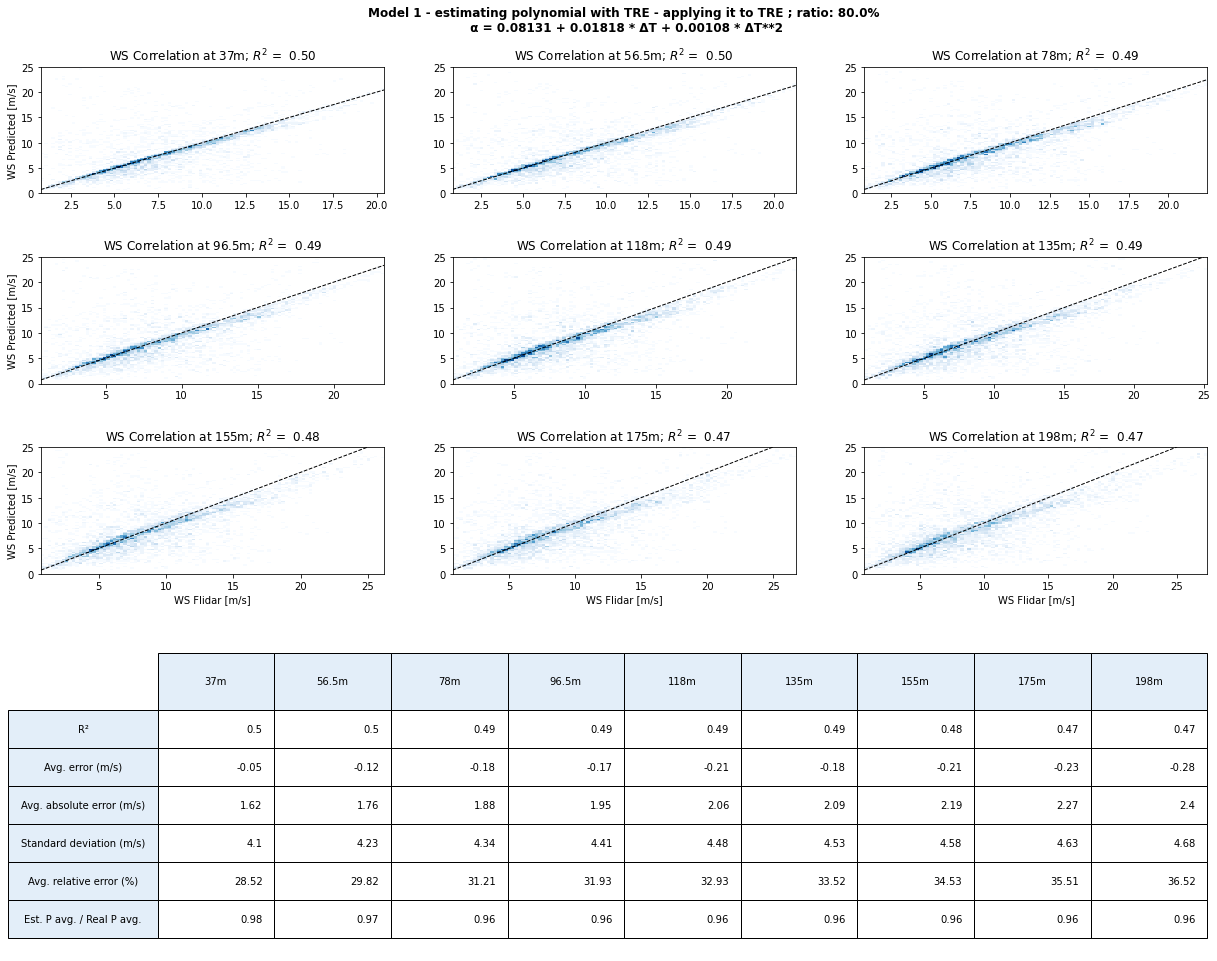

In [70]:
ls_train = ["TRE"]       # Choose a combination of sites from the ls_site list (by default A, B, C, TRE, NOY)
ls_test = ["TRE"]                       # Choose a combination of sites from the ls_site list (by default A, B, C, TRE, NOY)
ls_results = ["global"]                 # Choose the type of graph to display: global - monthly - 3d
min_length = False                       # True: sets 'min data' mode - False: sets 'all data' mode
ratio = 0.8                            # When using 'same site', set value to a float between 0 and 1. Example: if set to 0.8, 
                                            # 80% of the data will be used to extrapolate the polynomial, which will be applied to 20% of the data.
polynomial_alpha="constant"             # constant: global polynomial fit - monthly: monthly polynomial fit

model1(ls_train, ls_test, ls_results, Save_files, min_length, polynomial_alpha, ratio)

In [71]:
# data prep

globals()[f"df_{site}"]["Error"] = 100*np.abs(globals()[f"df_{site}"]["WS_118"] - globals()[f"df_{site}"]["Average Horizontal Wind Speed 118m"])/globals()[f"df_{site}"]["Average Horizontal Wind Speed 118m"]
globals()[f"df_{site}"]["bias"] = 100*(globals()[f"df_{site}"]["WS_118"] - globals()[f"df_{site}"]["Average Horizontal Wind Speed 118m"])/globals()[f"df_{site}"]["Average Horizontal Wind Speed 118m"]

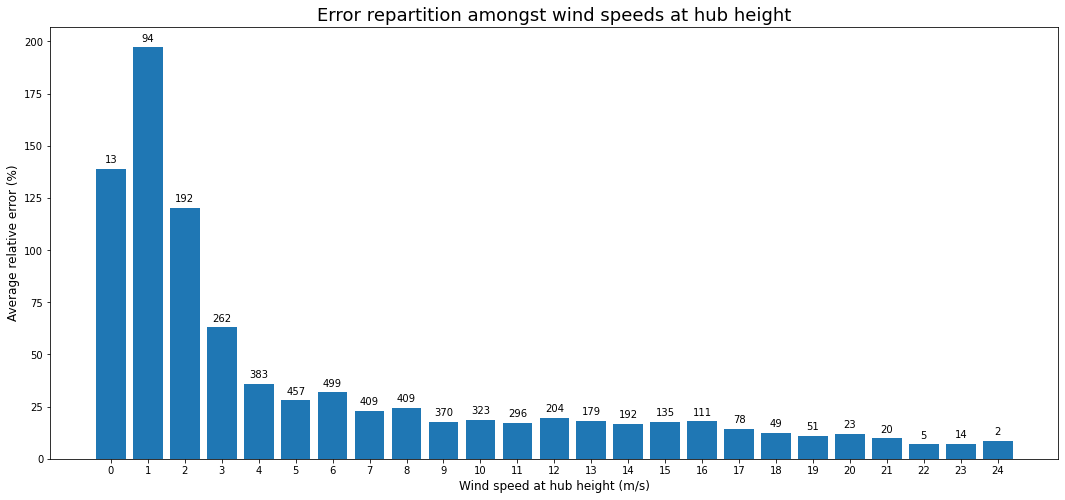

In [73]:
# Hub WS

n = int(globals()[f"df_{site}"]["Average Horizontal Wind Speed 118m"].max())
bins = np.linspace(0,n,n+1)
globals()[f"df_{site}"]["WS_lidar_bin"] = np.digitize(globals()[f"df_{site}"]["Average Horizontal Wind Speed 118m"], bins)

df_hist_hub = globals()[f"df_{site}"].groupby("WS_lidar_bin")\
                                .agg({'WS_lidar_bin':'size', 'Error':'mean'})\
                                .rename(columns={'WS_lidar_bin':'count', 'Error':'Error'})


fig = plt.figure(figsize=(14, 6))
ax = fig.add_axes([0,0,1,1])
ax.bar(df_hist_hub.index - 1, df_hist_hub["Error"])

ax.set_xlabel("Wind speed at hub height (m/s)", fontsize=12)
ax.set_ylabel("Average relative error (%)", fontsize=12)
ax.set_title("Error repartition amongst wind speeds at hub height", fontsize=18)

ax.set_xticks(bins)

rects = ax.patches

labels = df_hist_hub['count']

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height+2, label, ha="center", va="bottom"
    )

plt.show()

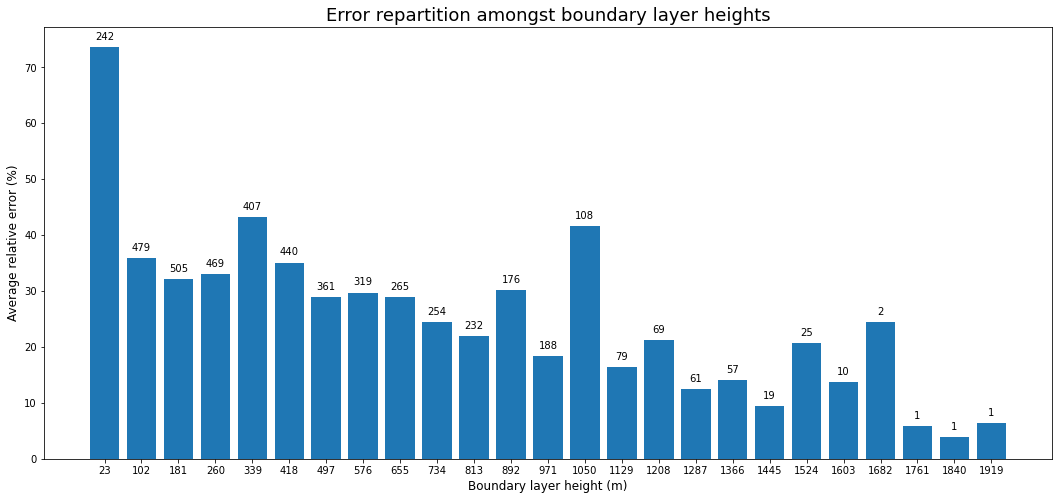

In [74]:
# blh

min = globals()[f"df_{site}"]["blh"].min()
max = globals()[f"df_{site}"]["blh"].max()
bins = np.linspace(min,max,25)
globals()[f"df_{site}"]["blh_bin"] = np.digitize(globals()[f"df_{site}"]["blh"], bins)

df_hist_blh = globals()[f"df_{site}"].groupby("blh_bin")\
                                .agg({'blh_bin':'size', 'Error':'mean'})\
                                .rename(columns={'blh_bin':'count', 'Error':'Error'})

df_hist_blh = df_hist_blh.reindex(list(range(df_hist_blh.index.min(),df_hist_blh.index.max()+1)),fill_value=0)
df_hist_blh["blh"] = bins.astype(int)

fig = plt.figure(figsize=(14, 6))
ax = fig.add_axes([0,0,1,1])
ax.bar(df_hist_blh["blh"].astype(str), df_hist_blh["Error"])

ax.set_xlabel("Boundary layer height (m)", fontsize=12)
ax.set_ylabel("Average relative error (%)", fontsize=12)
ax.set_title("Error repartition amongst boundary layer heights", fontsize=18)


rects = ax.patches

labels = df_hist_blh['count']

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height+1, label, ha="center", va="bottom"
    )

plt.show()

In [75]:
# Base WS and chnk - data prep

n = int(globals()[f"df_{site}"]["WS"].max())
bins_WS = np.linspace(0,n,n+1)
globals()[f"df_{site}"]["WS_bin"] = np.digitize(globals()[f"df_{site}"]["WS"], bins_WS)

df_hist_WS = globals()[f"df_{site}"].groupby("WS_bin")\
                                .agg({'WS_bin':'size', 'Error':'mean'})\
                                .rename(columns={'WS_bin':'count', 'Error':'Error'})


# Chnk

min = globals()[f"df_{site}"]["chnk"].min()
max = globals()[f"df_{site}"]["chnk"].max()
bins_chnk = np.linspace(min,max,25)
globals()[f"df_{site}"]["chnk_bin"] = np.digitize(globals()[f"df_{site}"]["chnk"], bins_chnk)

df_hist_chnk = globals()[f"df_{site}"].groupby("chnk_bin")\
                                .agg({'chnk_bin':'size', 'Error':'mean'})\
                                .rename(columns={'chnk_bin':'count', 'Error':'Error'})

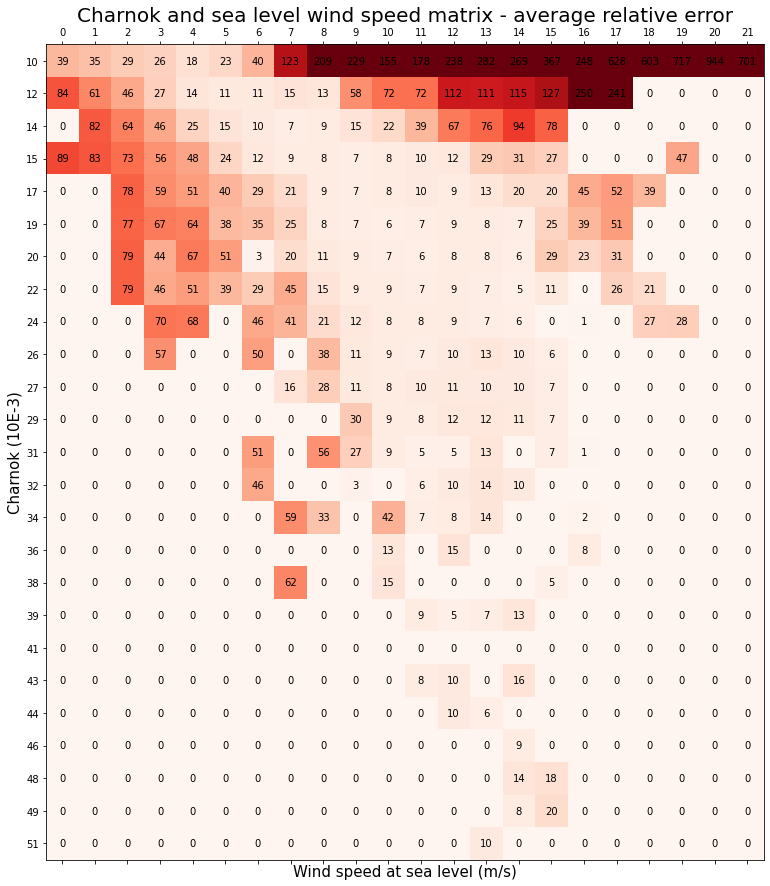

In [76]:
# Base WS and chnk - error graph

Matrix = np.zeros((len(bins_chnk), len(bins_WS)))
Matrix_counter = np.zeros((len(bins_chnk), len(bins_WS)))

for index, row in globals()[f"df_{site}"].iterrows():
      Matrix[int(row["chnk_bin"])-1, int(row["WS_bin"])-1] += row["Error"]
      Matrix_counter[int(row["chnk_bin"])-1, int(row["WS_bin"])-1] += 1

for i in range(len(Matrix)):
      for j in range(len(Matrix[0])):
            Matrix[i,j] /= Matrix_counter[i,j]

Matrix[np.isnan(Matrix)] = 0
int_matrix = Matrix.astype(int)

fig, ax = plt.subplots(figsize=(15,15), facecolor="white")
ax.matshow(int_matrix, cmap="Reds", vmin=0, vmax=150)

ax.set_xlabel("Wind speed at sea level (m/s)", fontsize=15)
ax.set_ylabel("Charnok (10E-3)", fontsize=15)
ax.set_title("Charnok and sea level wind speed matrix - average relative error", fontsize=20)

yticks = bins_chnk*1000
yticks = yticks.astype(int)

ax.set_xticks(bins_WS)
ax.set_yticks([i for i in range(25)])
ax.set_yticklabels([str(int(elem*1000)) for elem in bins_chnk])

for i in range(len(bins_WS)):
   for j in range(len(bins_chnk)):
      c = int_matrix[j, i]
      ax.text(i, j, str(c), va='center', ha='center')

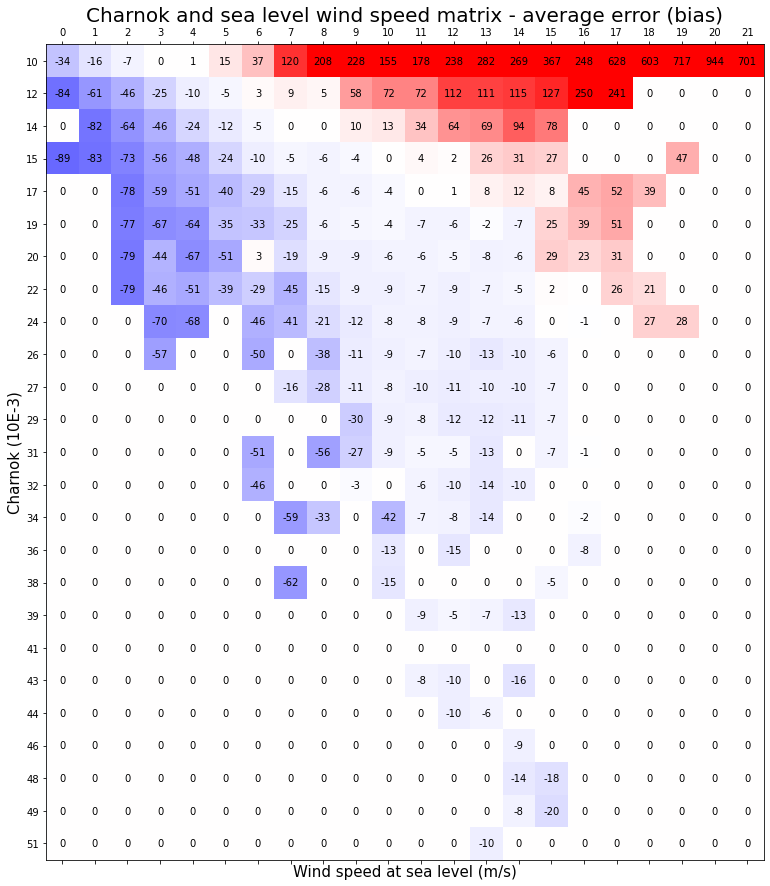

In [77]:
# Base WS and chnk - bias error graph

Matrix = np.zeros((len(bins_chnk), len(bins_WS)))
Matrix_counter = np.zeros((len(bins_chnk), len(bins_WS)))

for index, row in globals()[f"df_{site}"].iterrows():
      Matrix[int(row["chnk_bin"])-1, int(row["WS_bin"])-1] += row["bias"]
      Matrix_counter[int(row["chnk_bin"])-1, int(row["WS_bin"])-1] += 1

for i in range(len(Matrix)):
      for j in range(len(Matrix[0])):
            Matrix[i,j] /= Matrix_counter[i,j]

Matrix[np.isnan(Matrix)] = 0
int_matrix = Matrix.astype(int)


fig, ax = plt.subplots(figsize=(15,15), facecolor="white")
ax.matshow(int_matrix, cmap="bwr", vmin=-150, vmax=150)

ax.set_xlabel("Wind speed at sea level (m/s)", fontsize=15)
ax.set_ylabel("Charnok (10E-3)", fontsize=15)
ax.set_title("Charnok and sea level wind speed matrix - average error (bias)", fontsize=20)

yticks = bins_chnk*1000
yticks = yticks.astype(int)

ax.set_xticks(bins_WS)
ax.set_yticks([i for i in range(25)])
ax.set_yticklabels([str(int(elem*1000)) for elem in bins_chnk])

for i in range(len(bins_WS)):
   for j in range(len(bins_chnk)):
      c = int_matrix[j, i]
      ax.text(i, j, str(c), va='center', ha='center')

Model 2

In [89]:
datasets(ls_site)

[1/6] Importing power dataset...
[2/6] Site A:
	 Importing ERA5's dataset...
	 Importing lidar and meteo station's datasets...
	 Exporting the dataset...
[3/6] Site B:
	 Importing ERA5's dataset...
	 Importing lidar and meteo station's datasets...
	 Exporting the dataset...
[4/6] Site C:
	 Importing ERA5's dataset...
	 Importing lidar and meteo station's datasets...
	 Exporting the dataset...
[5/6] Site NOY:
	 Importing ERA5's dataset...
	 Importing lidar and meteo station's datasets...
	 Exporting the dataset...
[6/6] Site TRE:
	 Importing ERA5's dataset...
	 Importing lidar and meteo station's datasets...
	 Exporting the dataset...


In [90]:
# Import ML libraries

from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from time import time
import hyperopt.pyll
from hyperopt.pyll import scope
from sklearn.model_selection import train_test_split
import catboost
import optuna
from sklearn.metrics import mean_squared_error

heights = [37, 56.5, 78, 96.5, 118, 135, 155, 175, 198]

In [91]:
# Min data sampling

ls_site = ["A", "B", "C", "NOY", "TRE"]

min_len = np.min([len(globals()[f"df_X_{site}"]) for site in ls_site])

for site in ls_site:
    globals()[f"df_Xy_{site}"] = globals()[f"df_Xy_{site}"].sample(n=min_len)
    globals()[f"df_X_{site}"] = globals()[f"df_Xy_{site}"].loc[:, ~globals()[f"df_Xy_{site}"].columns.str.contains("Average Horizontal Wind Speed")]
    globals()[f"df_y_{site}"] = globals()[f"df_Xy_{site}"].loc[:, globals()[f"df_Xy_{site}"].columns.str.contains("Average Horizontal Wind Speed")]

0:	learn: 13.1732715	total: 866us	remaining: 1.3s
1:	learn: 12.1299979	total: 1.55ms	remaining: 1.16s
2:	learn: 12.0257822	total: 2.22ms	remaining: 1.1s
3:	learn: 11.9154308	total: 2.99ms	remaining: 1.12s
4:	learn: 10.3829306	total: 5.37ms	remaining: 1.6s
5:	learn: 9.5158723	total: 62.8ms	remaining: 15.6s
6:	learn: 9.5156832	total: 63.7ms	remaining: 13.6s
7:	learn: 9.5155895	total: 64.4ms	remaining: 12s
8:	learn: 8.4151840	total: 65.6ms	remaining: 10.9s
9:	learn: 8.3297026	total: 66.5ms	remaining: 9.9s
10:	learn: 8.3296893	total: 67.2ms	remaining: 9.09s
11:	learn: 7.6145286	total: 68.1ms	remaining: 8.43s
12:	learn: 7.6145252	total: 68.8ms	remaining: 7.86s
13:	learn: 7.6145235	total: 69.7ms	remaining: 7.38s
14:	learn: 7.6145227	total: 70.3ms	remaining: 6.95s
15:	learn: 7.4188147	total: 71.9ms	remaining: 6.66s
16:	learn: 7.3535893	total: 72.7ms	remaining: 6.33s
17:	learn: 7.2732272	total: 73.4ms	remaining: 6.04s
18:	learn: 6.8420769	total: 74.9ms	remaining: 5.83s
19:	learn: 6.8328413	tot

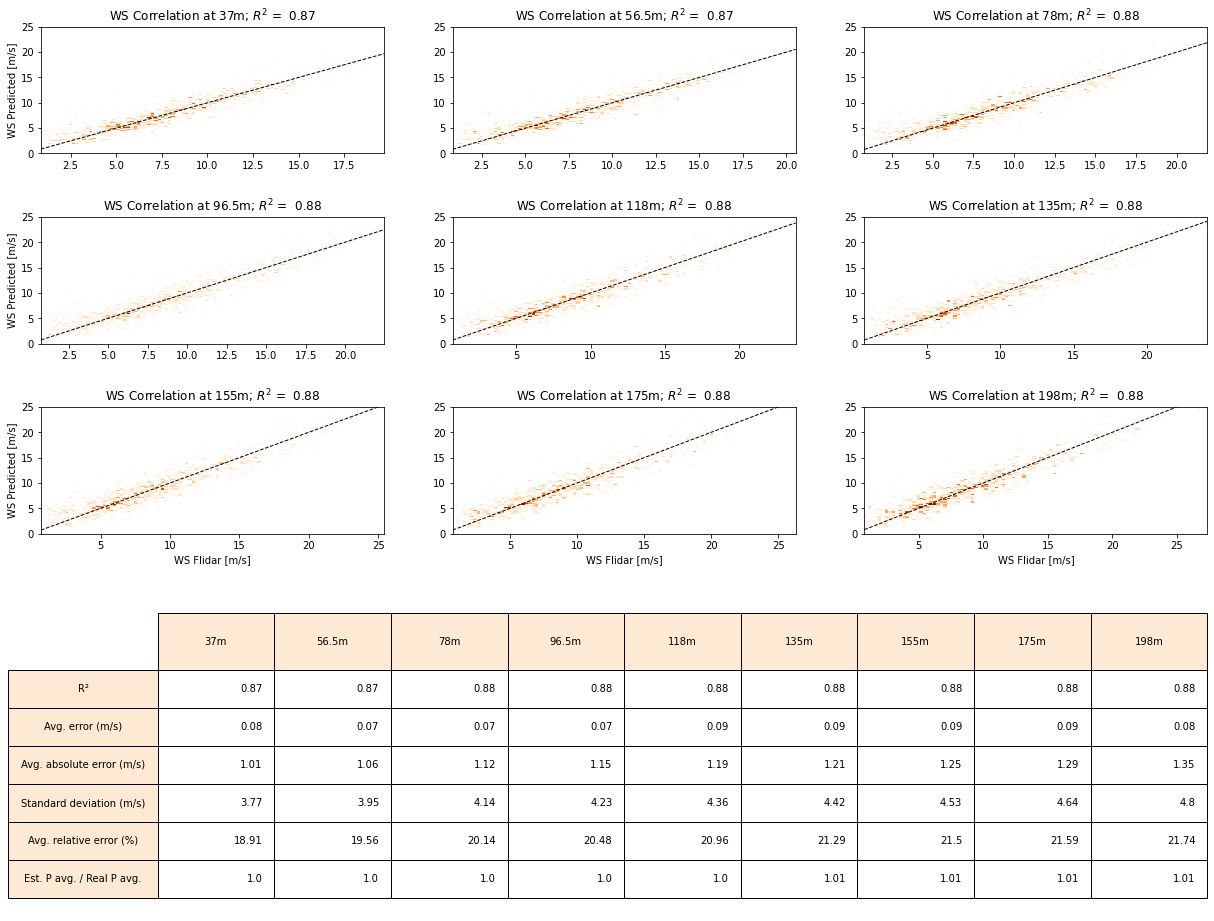

In [93]:
# Model setting up

df_X_train, df_X_test, df_X_test2, df_y_train, df_y_test, df_y_test2 = split(df_Xy_TRE, ratio)
site = "TRE"
gbm = CatBoostRegressor(iterations=1498, l2_leaf_reg=10, loss_function="MultiRMSE", learning_rate=0.2967860953365011, colsample_bylevel=0.09836322981422668, max_depth=14, random_strength=0.16923713290361092, boosting_type="Plain", bootstrap_type="MVS")
gbm.fit(df_X_train, df_y_train)
test_model(gbm, heights, ["global"], "No", df_X_test2, df_y_test2)
globals()[f"df_{site}"] = globals()[f"df_test"]

In [94]:
# data prep

globals()[f"df_{site}"]["Error"] = 100*np.abs(globals()[f"df_{site}"]["WS_118"] - globals()[f"df_{site}"]["Average Horizontal Wind Speed 118m"])/globals()[f"df_{site}"]["Average Horizontal Wind Speed 118m"]
globals()[f"df_{site}"]["bias"] = 100*(globals()[f"df_{site}"]["WS_118"] - globals()[f"df_{site}"]["Average Horizontal Wind Speed 118m"])/globals()[f"df_{site}"]["Average Horizontal Wind Speed 118m"]

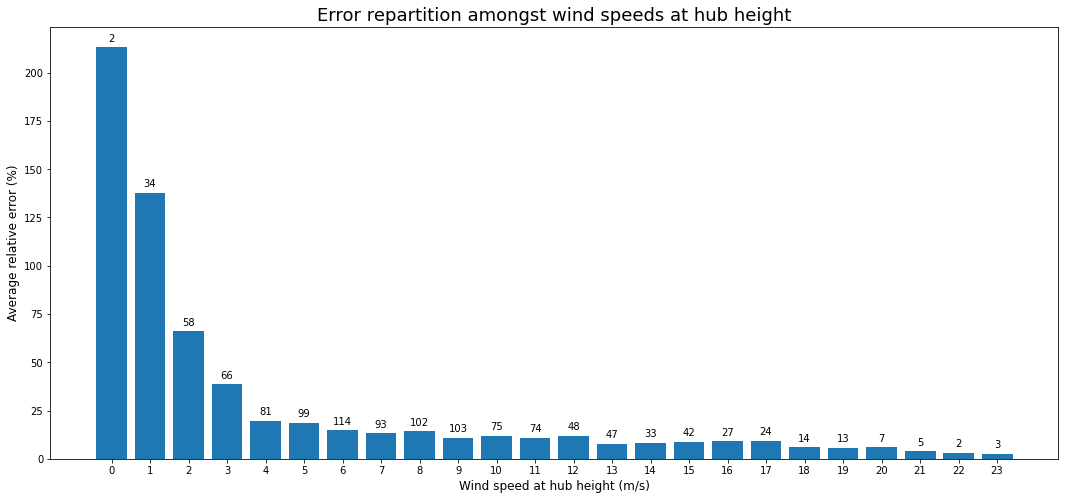

In [95]:
# Hub WS

n = int(globals()[f"df_{site}"]["Average Horizontal Wind Speed 118m"].max())
bins = np.linspace(0,n,n+1)
globals()[f"df_{site}"]["WS_lidar_bin"] = np.digitize(globals()[f"df_{site}"]["Average Horizontal Wind Speed 118m"], bins)

df_hist_hub = globals()[f"df_{site}"].groupby("WS_lidar_bin")\
                                .agg({'WS_lidar_bin':'size', 'Error':'mean'})\
                                .rename(columns={'WS_lidar_bin':'count', 'Error':'Error'})


fig = plt.figure(figsize=(14, 6))
ax = fig.add_axes([0,0,1,1])
ax.bar(df_hist_hub.index - 1, df_hist_hub["Error"])

ax.set_xlabel("Wind speed at hub height (m/s)", fontsize=12)
ax.set_ylabel("Average relative error (%)", fontsize=12)
ax.set_title("Error repartition amongst wind speeds at hub height", fontsize=18)

ax.set_xticks(bins)

rects = ax.patches

labels = df_hist_hub['count']

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height+2, label, ha="center", va="bottom"
    )

plt.show()

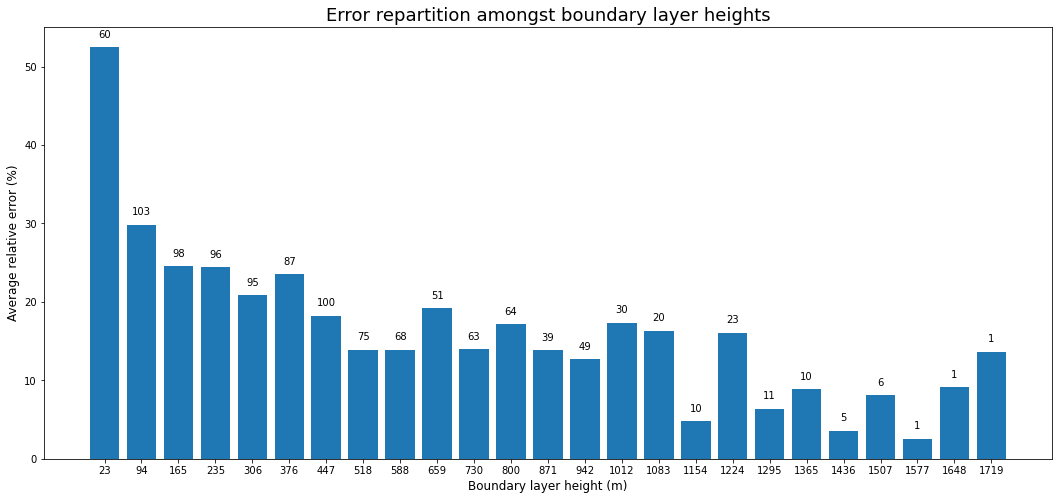

In [96]:
# blh

min = globals()[f"df_{site}"]["blh"].min()
max = globals()[f"df_{site}"]["blh"].max()
bins = np.linspace(min,max,25)
globals()[f"df_{site}"]["blh_bin"] = np.digitize(globals()[f"df_{site}"]["blh"], bins)

df_hist_blh = globals()[f"df_{site}"].groupby("blh_bin")\
                                .agg({'blh_bin':'size', 'Error':'mean'})\
                                .rename(columns={'blh_bin':'count', 'Error':'Error'})

df_hist_blh = df_hist_blh.reindex(list(range(df_hist_blh.index.min(),df_hist_blh.index.max()+1)),fill_value=0)
df_hist_blh["blh"] = bins.astype(int)

fig = plt.figure(figsize=(14, 6))
ax = fig.add_axes([0,0,1,1])
ax.bar(df_hist_blh["blh"].astype(str), df_hist_blh["Error"])

ax.set_xlabel("Boundary layer height (m)", fontsize=12)
ax.set_ylabel("Average relative error (%)", fontsize=12)
ax.set_title("Error repartition amongst boundary layer heights", fontsize=18)


rects = ax.patches

labels = df_hist_blh['count']

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height+1, label, ha="center", va="bottom"
    )

plt.show()

In [97]:
# Base WS and chnk - data prep

n = int(globals()[f"df_{site}"]["WS"].max())
bins_WS = np.linspace(0,n,n+1)
globals()[f"df_{site}"]["WS_bin"] = np.digitize(globals()[f"df_{site}"]["WS"], bins_WS)

df_hist_WS = globals()[f"df_{site}"].groupby("WS_bin")\
                                .agg({'WS_bin':'size', 'Error':'mean'})\
                                .rename(columns={'WS_bin':'count', 'Error':'Error'})


# Chnk

min = globals()[f"df_{site}"]["chnk"].min()
max = globals()[f"df_{site}"]["chnk"].max()
bins_chnk = np.linspace(min,max,25)
globals()[f"df_{site}"]["chnk_bin"] = np.digitize(globals()[f"df_{site}"]["chnk"], bins_chnk)

df_hist_chnk = globals()[f"df_{site}"].groupby("chnk_bin")\
                                .agg({'chnk_bin':'size', 'Error':'mean'})\
                                .rename(columns={'chnk_bin':'count', 'Error':'Error'})

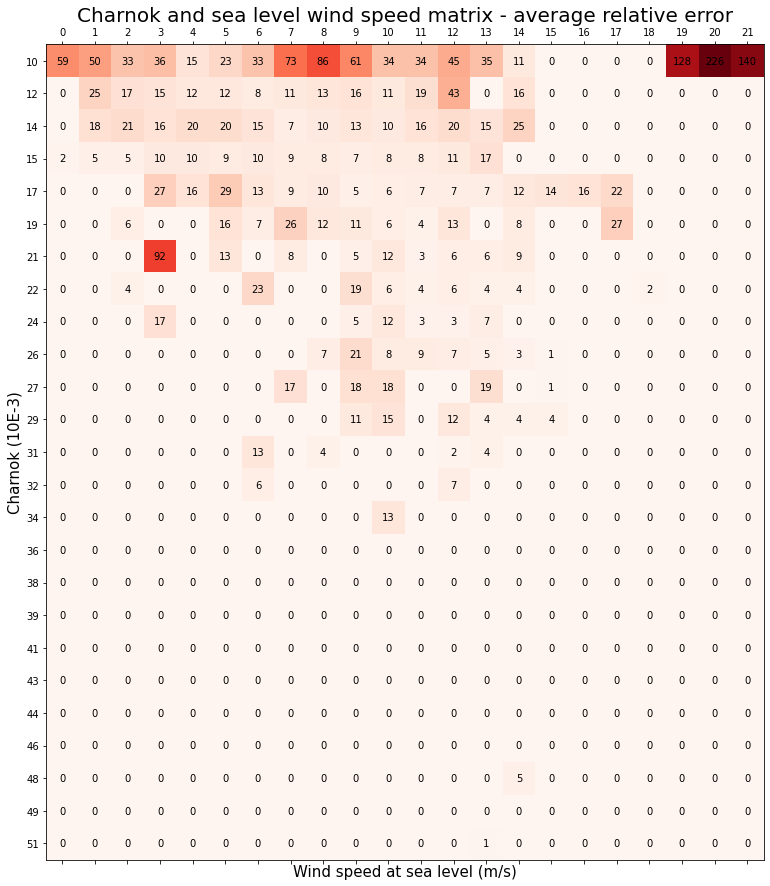

In [98]:
# Base WS and chnk - error graph

Matrix = np.zeros((len(bins_chnk), len(bins_WS)))
Matrix_counter = np.zeros((len(bins_chnk), len(bins_WS)))

for index, row in globals()[f"df_{site}"].iterrows():
      Matrix[int(row["chnk_bin"])-1, int(row["WS_bin"])-1] += row["Error"]
      Matrix_counter[int(row["chnk_bin"])-1, int(row["WS_bin"])-1] += 1

for i in range(len(Matrix)):
      for j in range(len(Matrix[0])):
            Matrix[i,j] /= Matrix_counter[i,j]

Matrix[np.isnan(Matrix)] = 0
int_matrix = Matrix.astype(int)

fig, ax = plt.subplots(figsize=(15,15), facecolor="white")
ax.matshow(int_matrix, cmap="Reds", vmin=0, vmax=150)

ax.set_xlabel("Wind speed at sea level (m/s)", fontsize=15)
ax.set_ylabel("Charnok (10E-3)", fontsize=15)
ax.set_title("Charnok and sea level wind speed matrix - average relative error", fontsize=20)

yticks = bins_chnk*1000
yticks = yticks.astype(int)

ax.set_xticks(bins_WS)
ax.set_yticks([i for i in range(25)])
ax.set_yticklabels([str(int(elem*1000)) for elem in bins_chnk])

for i in range(len(bins_WS)):
   for j in range(len(bins_chnk)):
      c = int_matrix[j, i]
      ax.text(i, j, str(c), va='center', ha='center')

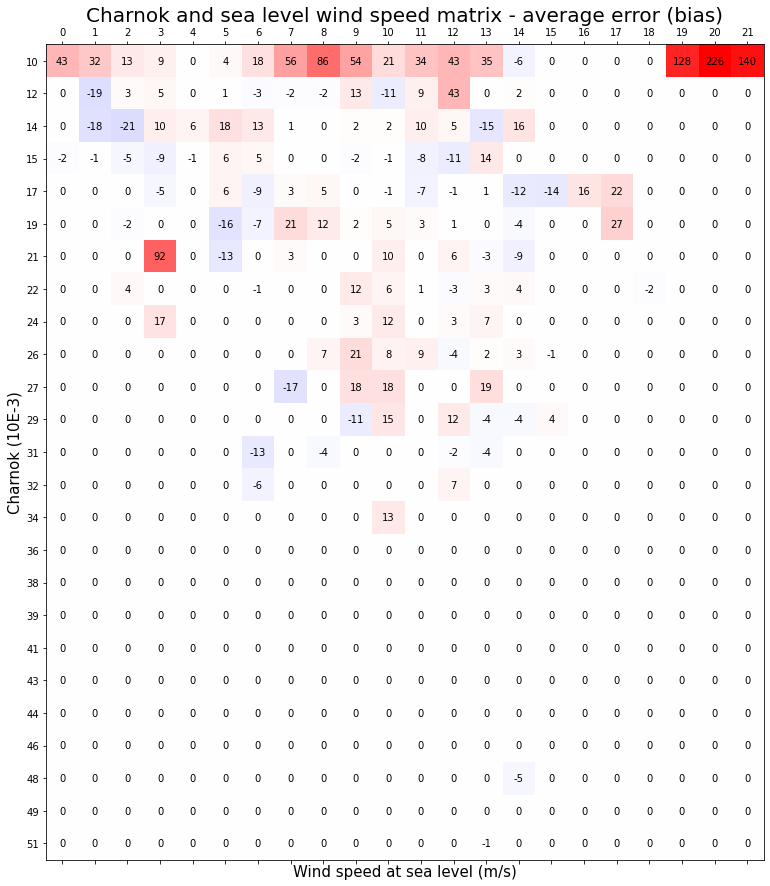

In [99]:
# Base WS and chnk - bias error graph

Matrix = np.zeros((len(bins_chnk), len(bins_WS)))
Matrix_counter = np.zeros((len(bins_chnk), len(bins_WS)))

for index, row in globals()[f"df_{site}"].iterrows():
      Matrix[int(row["chnk_bin"])-1, int(row["WS_bin"])-1] += row["bias"]
      Matrix_counter[int(row["chnk_bin"])-1, int(row["WS_bin"])-1] += 1

for i in range(len(Matrix)):
      for j in range(len(Matrix[0])):
            Matrix[i,j] /= Matrix_counter[i,j]

Matrix[np.isnan(Matrix)] = 0
int_matrix = Matrix.astype(int)


fig, ax = plt.subplots(figsize=(15,15), facecolor="white")
ax.matshow(int_matrix, cmap="bwr", vmin=-150, vmax=150)

ax.set_xlabel("Wind speed at sea level (m/s)", fontsize=15)
ax.set_ylabel("Charnok (10E-3)", fontsize=15)
ax.set_title("Charnok and sea level wind speed matrix - average error (bias)", fontsize=20)

yticks = bins_chnk*1000
yticks = yticks.astype(int)

ax.set_xticks(bins_WS)
ax.set_yticks([i for i in range(25)])
ax.set_yticklabels([str(int(elem*1000)) for elem in bins_chnk])

for i in range(len(bins_WS)):
   for j in range(len(bins_chnk)):
      c = int_matrix[j, i]
      ax.text(i, j, str(c), va='center', ha='center')